In [103]:
import os
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
training_file_path = os.path.expanduser('~/Documents/machine_learning_projects/predicting_backorders/Kaggle_Training_Dataset_v2.csv')
testing_file_path = os.path.expanduser('~/Documents/machine_learning_projects/predicting_backorders/Kaggle_Test_Dataset_v2.csv')
training_data = pd.read_csv(training_file_path)
testing_data = pd.read_csv(testing_file_path)
testing_data = testing_data.dropna()
display(testing_data['potential_issue'])
training_data = training_data.dropna()
display(training_data.describe())

2         No
3         No
4         No
5         No
13        No
15        No
22        No
30        No
34        No
36        No
37        No
53        No
54        No
58        No
59        No
60        No
63        No
67        No
68        No
71        No
81        No
83        No
84        No
85        No
86        No
99        No
101       No
115       No
116       No
118       No
          ..
242044    No
242045    No
242046    No
242047    No
242048    No
242049    No
242050    No
242051    No
242052    No
242053    No
242054    No
242055    No
242056    No
242057    No
242058    No
242059    No
242060    No
242061    No
242062    No
242063    No
242064    No
242065    No
242066    No
242067    No
242069    No
242070    No
242071    No
242072    No
242073    No
242074    No
Name: potential_issue, dtype: object

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06
mean,4.895098e+02,7.872267e+00,4.547493e+01,1.887439e+02,3.653390e+02,5.362801e+02,5.691140e+01,1.784835e+02,3.522319e+02,5.441272e+02,5.320380e+01,2.172666e+00,-1.014934e+00,-5.532225e-01,6.333207e-01
std,3.046168e+04,7.056024e+00,1.309357e+03,5.182992e+03,1.009962e+04,1.482576e+04,1.854775e+03,4.971129e+03,9.679297e+03,1.514871e+04,1.119034e+03,2.434021e+02,1.327273e+01,1.144580e+01,3.343933e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.900000e-01,6.900000e-01,0.000000e+00
50%,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.400000e-01,8.200000e-01,0.000000e+00
75%,7.800000e+01,9.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,2.500000e+01,5.000000e+00,1.600000e+01,3.300000e+01,5.000000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,2.057860e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [76]:
df = pd.DataFrame(np.random.choice(['yes', 'no'], size=(5,3)), columns=list('ABC'))
df = df.replace(['yes', 'no'], [1, 0])
display(df)
training_data = training_data.replace(['Yes','No'],[1,0])
testing_data = testing_data.replace(['Yes','No'],[1,0])

,A,B,C
0,1,0,0
1,0,1,1
2,1,1,1
3,0,1,1
4,1,1,1


In [77]:
columns = training_data.columns 

continuous_features = []
column_index = 0
continuous_features_index_tracker = []
for column in columns:
        #print column
        type_value = type(training_data[column].values[0])
        if (type_value == np.float64):
            continuous_features.append(column)
            continuous_features_index_tracker.append(column_index)
        column_index += 1

print continuous_features
print len(continuous_features)
print continuous_features_index_tracker
print len(continuous_features_index_tracker)

['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']
15
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16]
15


## Data Visualization & Feature Space Reduction



In [78]:
#general description of continuous variables
#display(training_data.describe())
display(training_data.median())
#How can the median of some of the categories be 0.00 exactly? Perhaps the medi

sku                  1955693.00
national_inv              14.00
lead_time                  8.00
in_transit_qty             0.00
forecast_3_month           0.00
forecast_6_month           0.00
forecast_9_month           0.00
sales_1_month              0.00
sales_3_month              1.00
sales_6_month              3.00
sales_9_month              4.00
min_bank                   0.00
potential_issue            0.00
pieces_past_due            0.00
perf_6_month_avg           0.84
perf_12_month_avg          0.82
local_bo_qty               0.00
deck_risk                  0.00
oe_constraint              0.00
ppap_risk                  0.00
stop_auto_buy              1.00
rev_stop                   0.00
went_on_backorder          0.00
dtype: float64

In [79]:
display(training_data.describe())

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,...,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06
mean,4.895098e+02,7.872267e+00,4.547493e+01,1.887439e+02,3.653390e+02,5.362801e+02,5.691140e+01,1.784835e+02,3.522319e+02,5.441272e+02,...,2.172666e+00,-1.014934e+00,-5.532225e-01,6.333207e-01,2.032538e-01,1.543825e-04,1.188090e-01,9.753675e-01,2.583545e-04,6.911927e-03
std,3.046168e+04,7.056024e+00,1.309357e+03,5.182992e+03,1.009962e+04,1.482576e+04,1.854775e+03,4.971129e+03,9.679297e+03,1.514871e+04,...,2.434021e+02,1.327273e+01,1.144580e+01,3.343933e+01,4.024199e-01,1.242412e-02,3.235638e-01,1.550025e-01,1.607134e-02,8.285021e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.900000e-01,6.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,...,0.000000e+00,8.400000e-01,8.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,7.800000e+01,9.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,2.500000e+01,5.000000e+00,1.600000e+01,3.300000e+01,5.000000e+01,...,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,...,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Notice that the mean and median of each category differs quite drastically. This indicates a need for data normalization. 

In [80]:
from sklearn import cross_validation as cv 
from sklearn import tree 
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

In [85]:
from sklearn.preprocessing import normalize
samples = training_data.sample(100000,random_state = 36)
#qty_related = ['national_inv', 'in_transit_qty', 'forecast_3_month', 
                   #'forecast_6_month', 'forecast_9_month', 'min_bank',
                   #'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                   #'sales_3_month', 'sales_6_month', 'sales_9_month',]
samples[continuous_features] = normalize(samples[continuous_features], axis=1)
testing_data[continuous_features] = normalize(testing_data[continuous_features], axis =1)
#display(samples.shape)
#display(testing_data.shape)
display(samples)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1030677,1388552,0.712415,0.020355,0.000000,0.000000,0.000000,0.000000,0.012722,0.068697,0.122128,...,0.000000,0.001603,0.002010,0.000000,0,0,1,1,0,0
555699,1903658,0.163727,0.982364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.063854,0.063854,0.000000,1,0,0,1,0,0
1349989,2935990,0.069861,0.001588,0.025404,0.214347,0.385825,0.562066,0.090502,0.246896,0.373917,...,0.000000,0.000778,0.000778,0.000000,0,0,0,1,0,0
1370142,2956929,0.993913,0.109422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.009027,0.009027,0.000000,0,0,0,1,0,0
756475,2104421,0.157893,0.003036,0.002657,0.195090,0.408018,0.543518,0.058831,0.173076,0.331349,...,0.000000,0.000300,0.000254,0.000000,0,0,0,1,0,0
959880,2307869,0.918637,0.122485,0.000000,0.000000,0.000000,0.000000,0.000000,0.122485,0.122485,...,0.000000,0.028172,0.039195,0.000000,1,0,0,1,0,0
899357,2247350,0.146510,0.016056,0.000000,0.114398,0.343195,0.571991,0.048168,0.186650,0.367278,...,0.000000,0.001044,0.001264,0.000000,0,0,1,1,0,0
1425324,3014414,0.242496,0.969985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.012125,0.013337,0.000000,0,0,0,1,0,0
617903,1965877,0.218295,0.873181,0.000000,0.000000,0.000000,0.109148,0.000000,0.000000,0.218295,...,0.000000,0.108056,0.106965,0.000000,0,0,0,1,0,0
305751,1653726,0.526851,0.842962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.074813,0.079028,0.000000,0,0,0,1,0,0


In [82]:
X_train_temp = samples.drop('went_on_backorder',axis = 1).values 
y_train_temp = samples['went_on_backorder'].values
X_test_temp = testing_data.drop('went_on_backorder', axis = 1).values
y_test_temp = testing_data['went_on_backorder'].values
print len(samples[samples['went_on_backorder'] == 0])
print len(samples[samples['went_on_backorder'] == 1])

99293
707


In [84]:
display(X_train_temp.shape)
display(X_train_temp)

(100000, 22)

array([[1388552, 0.712415101758609, 0.020354717193103115, ..., 1, 1, 0],
       [1903658, 0.16372731303383, 0.98236387820298, ..., 0, 1, 0],
       [2935990, 0.06986131844556695, 0.0015877572373992489, ..., 0, 1, 0],
       ..., 
       [2092506, 0.9993788211374025, 0.026299442661510592, ..., 1, 1, 0],
       [2105378, 0.282909958733525, 0.37721327831136664, ..., 0, 1, 0],
       [3041509, 0.16376013050862248, 0.982560783051735, ..., 0, 1, 0]], dtype=object)

In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 12, ratio = 1.0)
x_smote_training_data, y_smote_training_data = sm.fit_sample(X_train_temp, y_train_temp)
print(np.bincount(y_smote_training_data))
x_smote_df = pd.DataFrame(x_smote_training_data, columns)
#print(x_smote_columns)
display(x_smote_df)

[99293 99293]


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.388552e+06,0.087697,0.984575,0.000000,0.000000,0.000000,0.000000,0.001566,0.008456,0.015034,...,0.0,0.000000,0.077535,0.097227,0.000000,0.000000,0.0,1.000000,1.000000,0.0
1,1.903658e+06,0.082699,0.992391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.064505,0.064505,0.000000,1.000000,0.0,0.000000,1.000000,0.0
2,2.935990e+06,0.026556,0.760242,0.009657,0.081478,0.146660,0.213654,0.034402,0.093851,0.142134,...,0.0,0.000000,0.372519,0.372519,0.000000,0.000000,0.0,0.000000,1.000000,0.0
3,2.956929e+06,0.082490,0.989877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.081665,0.081665,0.000000,0.000000,0.0,0.000000,1.000000,0.0
4,2.104421e+06,0.019425,0.984188,0.000327,0.024001,0.050196,0.066866,0.007238,0.021292,0.040764,...,0.0,0.000000,0.097189,0.082426,0.000000,0.000000,0.0,0.000000,1.000000,0.0
5,2.307869e+06,0.390864,0.843559,0.000000,0.000000,0.000000,0.000000,0.000000,0.052115,0.052115,...,0.0,0.000000,0.194019,0.269939,0.000000,1.000000,0.0,0.000000,1.000000,0.0
6,2.247350e+06,0.018082,0.987223,0.000000,0.014119,0.042357,0.070595,0.005945,0.023036,0.045329,...,0.0,0.000000,0.064170,0.077744,0.000000,0.000000,0.0,1.000000,1.000000,0.0
7,3.014414e+06,0.124014,0.992109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.012401,0.013642,0.000000,0.000000,0.0,0.000000,1.000000,0.0
8,1.965877e+06,0.057617,0.977790,0.000000,0.000000,0.000000,0.028808,0.000000,0.000000,0.057617,...,0.0,0.000000,0.121001,0.119779,0.000000,0.000000,0.0,0.000000,1.000000,0.0
9,1.653726e+06,0.123029,0.984235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.087351,0.092272,0.000000,0.000000,0.0,0.000000,1.000000,0.0


In [17]:
#majority classifier (baseline #1)
from sklearn.dummy import DummyClassifier
clf_dummy = DummyClassifier(strategy='most_frequent', random_state =0)
clf_dummy.fit(x_smote_training_data, y_smote_training_data)
clf_dummy_predictions = clf_dummy.predict(X_test_temp)
#accuracy score
print(clf_dummy.score(X_test_temp, y_test_temp))
#recall score
clf_dummy_recall = recall_score(y_test_temp,clf_dummy_predictions)
print clf_dummy_recall
#precision score 
clf_dummy_precision = precision_score(y_test_temp, clf_dummy_predictions)
print clf_dummy_precision

0.988546344639
0.0
0.0


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
#baseline #2 classifier decision tree stump
from sklearn import tree
clf_stump = tree.DecisionTreeClassifier(max_depth=1)
clf_stump.fit(x_smote_training_data, y_smote_training_data)
clf_stump_predictions = clf_stump.predict(X_test_temp)
clf_stump_predictions_proba = clf_stump.predict_proba(X_test_temp)
print(recall_score(y_test_temp,clf_stump_predictions))
print(precision_score(y_test_temp, clf_stump_predictions))

0.843701996928
0.0306933597843


In [19]:
#baseline classifier decision stump with PCA applied 


In [20]:
#Without any preprocessing, normalization, just using the out-of-the-box Random Forest Classifier
#strange thing is that as the number of trees grow, the model's F1 score gets lower and lower
#keep in mind that F1 score is affected by class imbalance, refer to paper
from sklearn.ensemble import RandomForestClassifier
clf_temp = RandomForestClassifier(n_estimators=100, max_depth = 15)
#clf_temp = clf_temp.fit(X_train_temp, y_train_temp)
clf_temp = clf_temp.fit(x_smote_training_data, y_smote_training_data)
y_predict_temp = clf_temp.predict(X_test_temp)
score_temp = metrics.f1_score(y_test_temp, y_predict_temp)
y_predict_temp_proba = clf_temp.predict_proba(X_test_temp)
print score_temp


0.125887071891


In [21]:
clf_temp_precision_score = precision_score(y_test_temp, y_predict_temp)
clf_temp_recall_score = recall_score(y_test_temp, y_predict_temp)
print clf_temp_recall_score
print clf_temp_precision_score

0.0783410138249
0.320251177394


array([[224314,    433],
       [  2400,    204]])

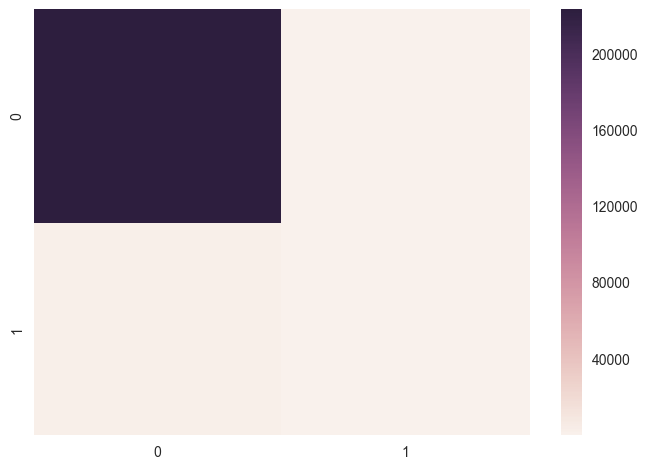

In [22]:
import matplotlib.pyplot as plt 
#taking a look at confusion matrix for the base Random Forest Classifier without class balancing
from sklearn.metrics import confusion_matrix 
import pandas as pd
import seaborn as sn
cm = confusion_matrix(y_test_temp, y_predict_temp)
display(cm)
sn.heatmap(cm)

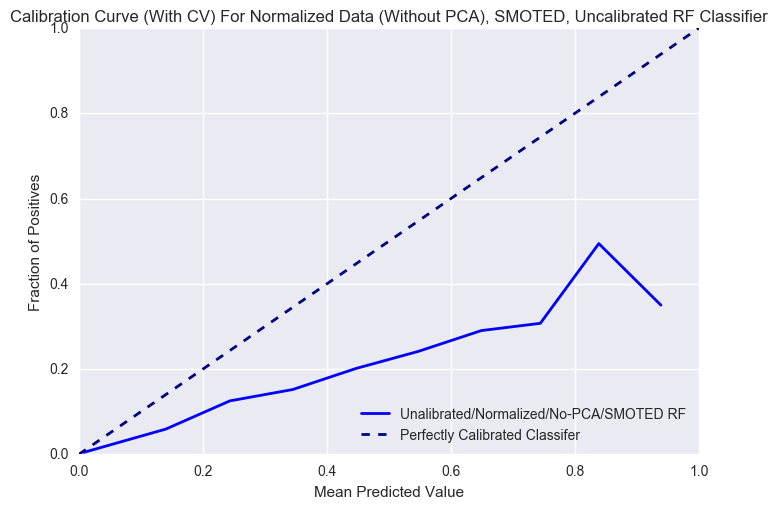

In [26]:
from sklearn.calibration import calibration_curve
frac_of_pos, mean_pred_val = calibration_curve(y_test_temp, y_predict_temp_proba[:,1], n_bins = 10, normalize = True)
plt.plot(mean_pred_val, frac_of_pos, color = 'blue', lw = 2, label = 'Unalibrated/Normalized/No-PCA/SMOTED RF')
plt.plot([0,1], [0,1], color = 'navy', lw =2, linestyle = '--', label = 'Perfectly Calibrated Classifer')
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (With CV) For Normalized Data (Without PCA), SMOTED, Uncalibrated RF Classifier')
plt.legend(loc = 'lower right')
plt.show()

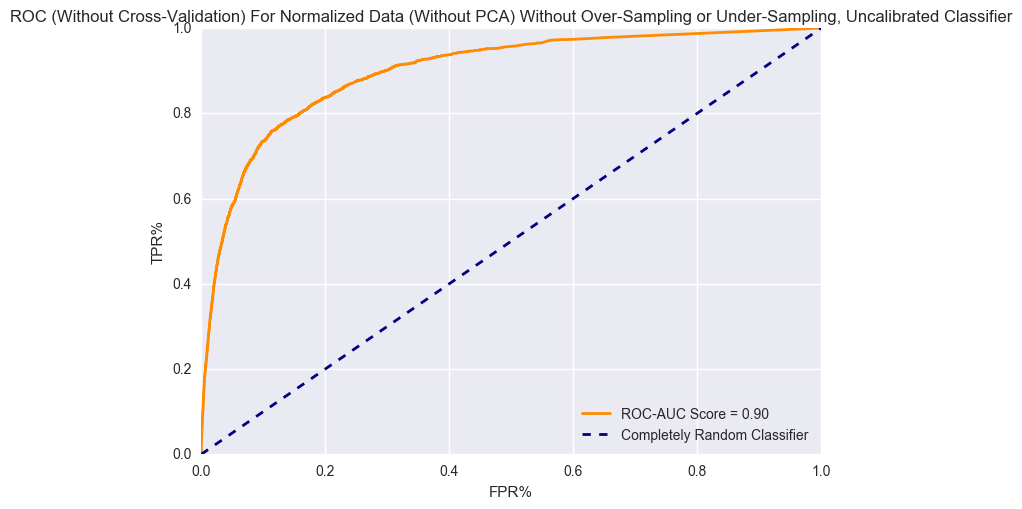

0.89825349578779123

In [27]:
#time to do ROC curve analysis 
from sklearn.metrics import roc_curve, roc_auc_score 
base_auc_score = roc_auc_score(y_test_temp, y_predict_temp_proba[:,1])
fpr, tpr, thresholds = roc_curve(y_test_temp, y_predict_temp_proba[:,1])
plt.plot(fpr,tpr, color='darkorange',lw=2, label = 'ROC-AUC Score = %0.2f' % base_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Completely Random Classifier')
plt.xlabel("FPR%")
plt.ylabel("TPR%")
plt.legend(loc='lower right')
plt.title("ROC (Without Cross-Validation) For Normalized Data (Without PCA) Without Over-Sampling or Under-Sampling, Uncalibrated Classifier")
plt.show()
display(base_auc_score)

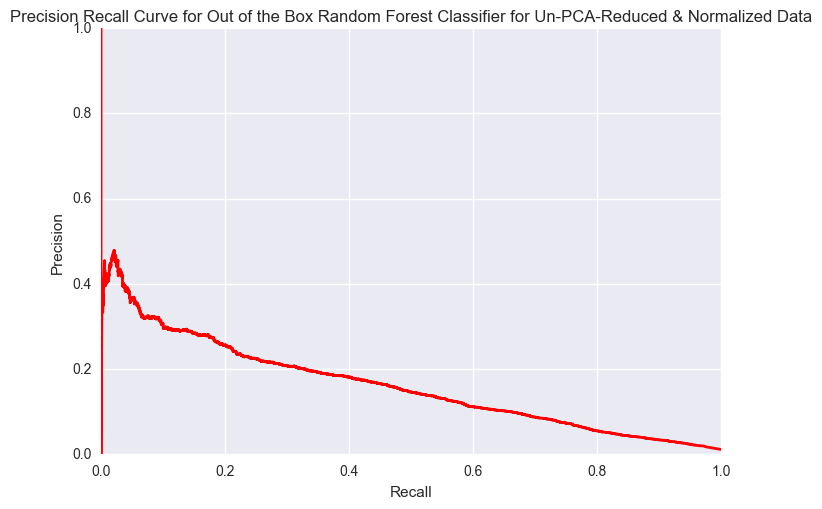

In [28]:
#calculating the precision recall curve 
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test_temp, y_predict_temp_proba[:,1])
plt.plot(recall, precision, color = 'red', lw = 2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve for Out of the Box Random Forest Classifier for Un-PCA-Reduced & Normalized Data")
plt.show()
#from what I can tell the out of the box classifier looks like shit

In [29]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.cross_validation import KFold
kfold = KFold(len(X_train_temp),n_folds = 10)
calibrated_clf_temp = CalibratedClassifierCV(clf_temp, cv = kfold, method = 'isotonic')
calibrated_clf_temp = calibrated_clf_temp.fit(x_smote_training_data, y_smote_training_data)
y_predict_calibrated = calibrated_clf_temp.predict(X_test_temp)
score_calibrated = metrics.f1_score(y_test_temp,y_predict_calibrated)
y_predict_calibrated_proba = calibrated_clf_temp.predict_proba(X_test_temp)

In [30]:
calibrated_clf_precision_score = precision_score(y_test_temp, y_predict_calibrated)
calibrated_clf_recall_score = recall_score(y_test_temp, y_predict_calibrated)
print calibrated_clf_precision_score
print calibrated_clf_recall_score
print y_predict_calibrated.shape
print y_smote_training_data.shape
print x_smote_training_data.shape
print sum(y_smote_training_data)

0.227272727273
0.00192012288786
(227351,)
(198586,)
(198586, 22)
99293


In [31]:
print(sum(y_predict_calibrated))
print(y_predict_calibrated_proba)

22
[[ 0.99887246  0.00112754]
 [ 0.99887246  0.00112754]
 [ 0.99884272  0.00115728]
 ..., 
 [ 0.99681901  0.00318099]
 [ 0.99681901  0.00318099]
 [ 0.99681901  0.00318099]]


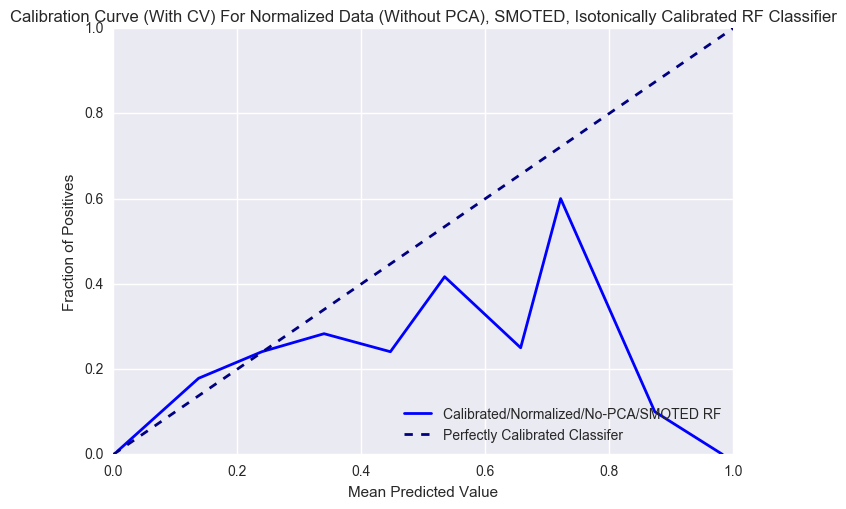

In [32]:
frac_of_pos, mean_pred_val = calibration_curve(y_test_temp, y_predict_calibrated_proba[:,1], n_bins = 10, normalize = True)
plt.plot(mean_pred_val, frac_of_pos, color = 'blue', lw = 2, label = 'Calibrated/Normalized/No-PCA/SMOTED RF')
plt.plot([0,1], [0,1], color = 'navy', lw =2, linestyle = '--', label = 'Perfectly Calibrated Classifer')
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (With CV) For Normalized Data (Without PCA), SMOTED, Isotonically Calibrated RF Classifier')
plt.legend(loc = 'lower right')
plt.show()

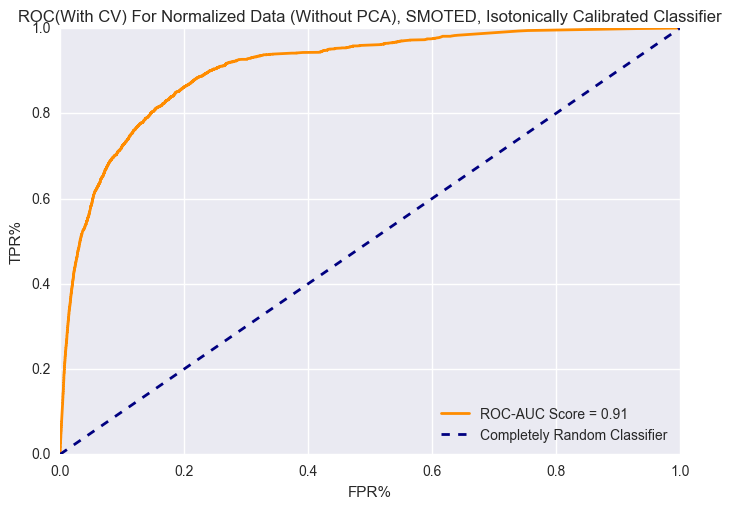

In [33]:
#time to do ROC curve analysis for Calibrated/KFold-Validated, SMOTED, UNPCAed classifer still using Random Forest Algorithm 
calibrated_base_auc_score = roc_auc_score(y_test_temp, y_predict_calibrated_proba[:,1])
fpr, tpr, thresholds = roc_curve(y_test_temp, y_predict_calibrated_proba[:,1])
plt.plot(fpr,tpr, color='darkorange',lw=2, label = 'ROC-AUC Score = %0.2f' % calibrated_base_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Completely Random Classifier')
plt.xlabel("FPR%")
plt.ylabel("TPR%")
plt.legend(loc='lower right')
plt.title("ROC(With CV) For Normalized Data (Without PCA), SMOTED, Isotonically Calibrated Classifier")
plt.show()
#display(base_auc_score)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
y_train_sample = samples['went_on_backorder'].values
PCA_train = PCA(n_components=5)
#X_train_reduced = PCA_train.fit_transform(X_train_temp)
X_train_reduced = PCA_train.fit_transform(x_smote_training_data)
clf_PCA_only = RandomForestClassifier(n_estimators=100)
#clf_PCA_only = clf_PCA_only.fit(X_train_reduced, y_train_sample)
clf_PCA_only = clf_PCA_only.fit(X_train_reduced, y_smote_training_data)
X_dataset_test = testing_data.drop('went_on_backorder', axis=1).values
y_dataset_test = testing_data['went_on_backorder'].values
X_dataset_test_reduced = PCA_train.fit_transform(X_dataset_test)
y_dataset_test_predictions = clf_PCA_only.predict_proba(X_dataset_test_reduced)
#test_score = metrics.f1_score(y_dataset_test, y_dataset_test_predictions)
#print test_score 

In [35]:
display(x_smote_training_data)

array([[  1.38855200e+06,   7.12565085e-01,   8.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.90365800e+06,   1.00000000e+00,   1.20000000e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  2.93599000e+06,   6.98614488e-02,   2.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.21308628e+06,   3.73511421e-01,   7.79544827e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  2.23698063e+06,   0.00000000e+00,   7.31547345e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  2.12826585e+06,   3.78408423e-03,   6.25635301e+00, ...,
          7.09392169e-01,   1.00000000e+00,   0.00000000e+00]])

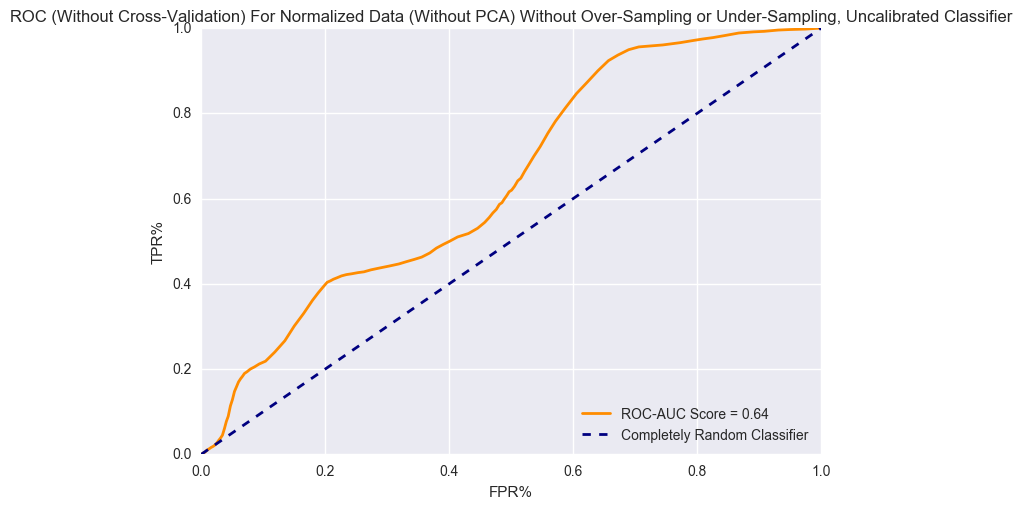

0.64283681021438976

In [36]:
#time to do ROC curve analysis 
from sklearn.metrics import roc_curve, roc_auc_score 
base_auc_score = roc_auc_score(y_dataset_test, y_dataset_test_predictions[:,1])
fpr, tpr, thresholds = roc_curve(y_dataset_test, y_dataset_test_predictions[:,1])
plt.plot(fpr,tpr, color='darkorange',lw=2, label = 'ROC-AUC Score = %0.2f' % base_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Completely Random Classifier')
plt.xlabel("FPR%")
plt.ylabel("TPR%")
plt.legend(loc='lower right')
plt.title("ROC (Without Cross-Validation) For Normalized Data (Without PCA) Without Over-Sampling or Under-Sampling, Uncalibrated Classifier")
plt.show()
display(base_auc_score)

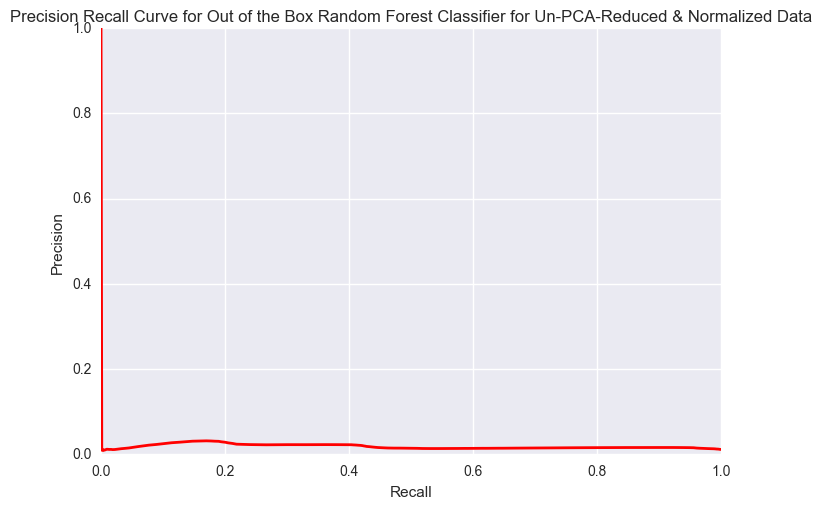

In [37]:
#calculating the precision recall curve 
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_dataset_test, y_dataset_test_predictions[:,1])
plt.plot(recall, precision, color = 'red', lw = 2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve for Out of the Box Random Forest Classifier for Un-PCA-Reduced & Normalized Data")
plt.show()
#from what I can tell the out of the box classifier looks like shit

In [214]:
class custom_PCA:
    from sklearn.decomposition import PCA
    import pandas as pd 
    
    def __init__(self,n_components,continuous_features,all_features):
        self.n_components = n_components
        self.continuous_features = continuous_features
        self.all_features = all_features
        self.pca = PCA(n_components = self.n_components)
    
    def sample(self, X_original):
        X = pd.DataFrame
    
    def continuous_feature_extract(self, X_original):
        X_dict = {}
        continuous_features = self.continuous_features
        all_features = self.all_features 
        X_original = pd.DataFrame(X_original, columns = all_features[0:(len(all_features)-1)])
        X_cont_only = X_original[continuous_features]
        X_non_cont = X_original.drop(continuous_features, axis =1)
        X_dict['X_non_cont'] = X_non_cont
        X_dict['X_cont_only'] = X_cont_only
        return X_dict
        
    
    def fit(self,X_original):
        X_dict = self.continuous_feature_extract(X_original)
        X_cont_only = X_dict['X_cont_only']
        X_non_cont = X_dict['X_non_cont']
        X_cont_only = pd.DataFrame(self.pca.fit(X_cont_only))
        X_joined =X_cont_only.join(X_non_cont)
        return X_joined
        

    def fit_transform(self,X_original):
        X_dict = self.continuous_feature_extract(X_original)
        X_cont_only = X_dict['X_cont_only']
        X_non_cont = X_dict['X_non_cont']
        X_cont_only = pd.DataFrame(self.pca.fit_transform(X_cont_only))
        X_joined = X_cont_only.join(X_non_cont)
        return X_joined
    
    def transform(self,X_original):
        X_dict = self.continuous_feature_extract(X_original)
        X_cont_only = X_dict['X_cont_only']
        X_non_cont = X_dict['X_non_cont']
        X_cont_only = pd.DataFrame(self.pca.transform(X_cont_only))
        X_joined = X_cont_only.join(X_non_cont)
        return X_joined

        

In [215]:
pca_custom = custom_PCA(5,continuous_features,columns)
#X_joined = custom_pca.fit_transform(x_smote_training_data)
#display(x_smote_training_data)
test = pca_custom.fit_transform(x_smote_training_data)
display(test)

,0,1,2,3,4,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,0.099726,0.098093,-0.042321,0.039129,-0.005958,1.388552e+06,0.0,0.000000,0.0,1.000000,1.000000,0.0
1,0.145494,0.118845,-0.037218,-0.022908,0.007032,1.903658e+06,0.0,1.000000,0.0,0.000000,1.000000,0.0
2,-0.389377,-0.176685,0.046679,0.067646,0.043418,2.935990e+06,0.0,0.000000,0.0,0.000000,1.000000,0.0
3,0.122969,0.121588,-0.040235,-0.024170,0.015304,2.956929e+06,0.0,0.000000,0.0,0.000000,1.000000,0.0
4,0.076029,0.057858,0.056795,0.024619,-0.011981,2.104421e+06,0.0,0.000000,0.0,0.000000,1.000000,0.0
5,-0.137959,0.011022,-0.334141,0.019820,-0.091927,2.307869e+06,0.0,1.000000,0.0,0.000000,1.000000,0.0
6,0.102293,0.055124,0.057820,0.034091,-0.014290,2.247350e+06,0.0,0.000000,0.0,1.000000,1.000000,0.0
7,0.208631,0.105528,-0.061258,-0.027684,-0.039598,3.014414e+06,0.0,0.000000,0.0,0.000000,1.000000,0.0
8,0.048063,0.086498,-0.013786,0.055046,0.008388,1.965877e+06,0.0,0.000000,0.0,0.000000,1.000000,0.0
9,0.108000,0.120491,-0.073584,-0.033068,-0.003251,1.653726e+06,0.0,0.000000,0.0,0.000000,1.000000,0.0


In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# pipe = Pipeline([
#     ('reduce_dim', PCA()),
#     ('classify', 
# ])

# N_FEATURES_OPTIONS = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,]
# C_OPTIONS = [1, 10, 100, 1000]
# param_grid = [
#     {
#         'reduce_dim': [PCA(iterated_power=7), NMF()],
#         'reduce_dim_n__components': N_FEATURES_OPTIONS,
#         'classify__C': C_OPTIONS
#     },
#     {
#         'reduce_dim': [SelectKBest(chi2)],
#         'reduce_dim__k': N_FEATURES_OPTIONS,
#         'classify__C': C_OPTIONS
#     },
# ]
# reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

# grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
# digits = load_digits()
# grid.fit(digits.data, digits.target)

x_pca_smote_train = custom_pca(x_smote_training_data,2, continuous_features)                        
#display(x_pca_smote_train)
x_pca_smote_test = custom_pca(X_test_temp,2,continuous_features)
print(x_pca_smote_train.shape)
print(x_pca_smote_test.shape)
#display(x_pca_smote_test)
clf_PCA_only_ = RandomForestClassifier(n_estimators=100)
clf_PCA_only = clf_PCA_only.fit(x_pca_smote_train, y_smote_training_data)
y_dataset_test_predictions = clf_PCA_only.predict(x_pca_smote_test)
y_dataset_test_predictions_proba = clf_PCA_only.predict_proba(x_pca_smote_test)
test_score = metrics.f1_score(y_dataset_test, y_dataset_test_predictions)

(198586, 9)
(227351, 9)


//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


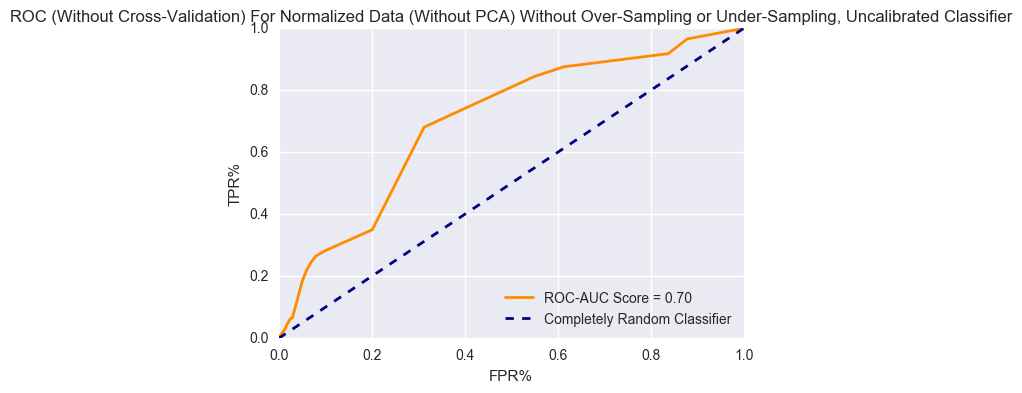

0.70016042428647385

In [130]:
#time to do ROC curve analysis 
from sklearn.metrics import roc_curve, roc_auc_score 
base_auc_score = roc_auc_score(y_dataset_test, y_dataset_test_predictions_proba[:,1])
fpr, tpr, thresholds = roc_curve(y_dataset_test, y_dataset_test_predictions_proba[:,1])
plt.plot(fpr,tpr, color='darkorange',lw=2, label = 'ROC-AUC Score = %0.2f' % base_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Completely Random Classifier')
plt.xlabel("FPR%")
plt.ylabel("TPR%")
plt.legend(loc='lower right')
plt.title("ROC (Without Cross-Validation) For Normalized Data (Without PCA) Without Over-Sampling or Under-Sampling, Uncalibrated Classifier")
plt.show()
display(base_auc_score)